# Example of a Guided Project: Linear Regression Modeling with the California Housing Dataset

In this assignment, you will explore, visualize, and build linear regression models to predict housing prices in California based on real-world features. This is a guided project—**follow each step, run the code, and answer the questions where prompted.**

**Skills Covered:**
- Exploratory Data Analysis (EDA)
- Data Cleaning & Feature Engineering
- Visualization with Matplotlib
- Linear Regression (Scikit-learn)
- Model Evaluation and Interpretation

---

## 1. Introduction

The California Housing dataset describes housing prices and related attributes in California districts from the 1990 Census. Your goal is to predict the **median house value** based on the other features using linear regression.

**Dataset Features:**
- `MedInc`: Median income in block group
- `HouseAge`: Median house age in block group
- `AveRooms`: Average number of rooms
- `AveBedrms`: Average number of bedrooms
- `Population`: Block group population
- `AveOccup`: Average house occupancy
- `Latitude`, `Longitude`: Geographical location

---

## 2. Setup: Import Libraries and Load Data

*Run the following cell to import libraries and load the dataset.*


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load California Housing data
california = fetch_california_housing(as_frame=True)
df = california.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
print("Shape of the data:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape of the data: (20640, 9)

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


---

## 4. Visualize Distributions

Let's explore how each feature is distributed.  
**Task:**  
- Plot histograms for all features.
- Comment on any skewness, outliers, or interesting patterns.


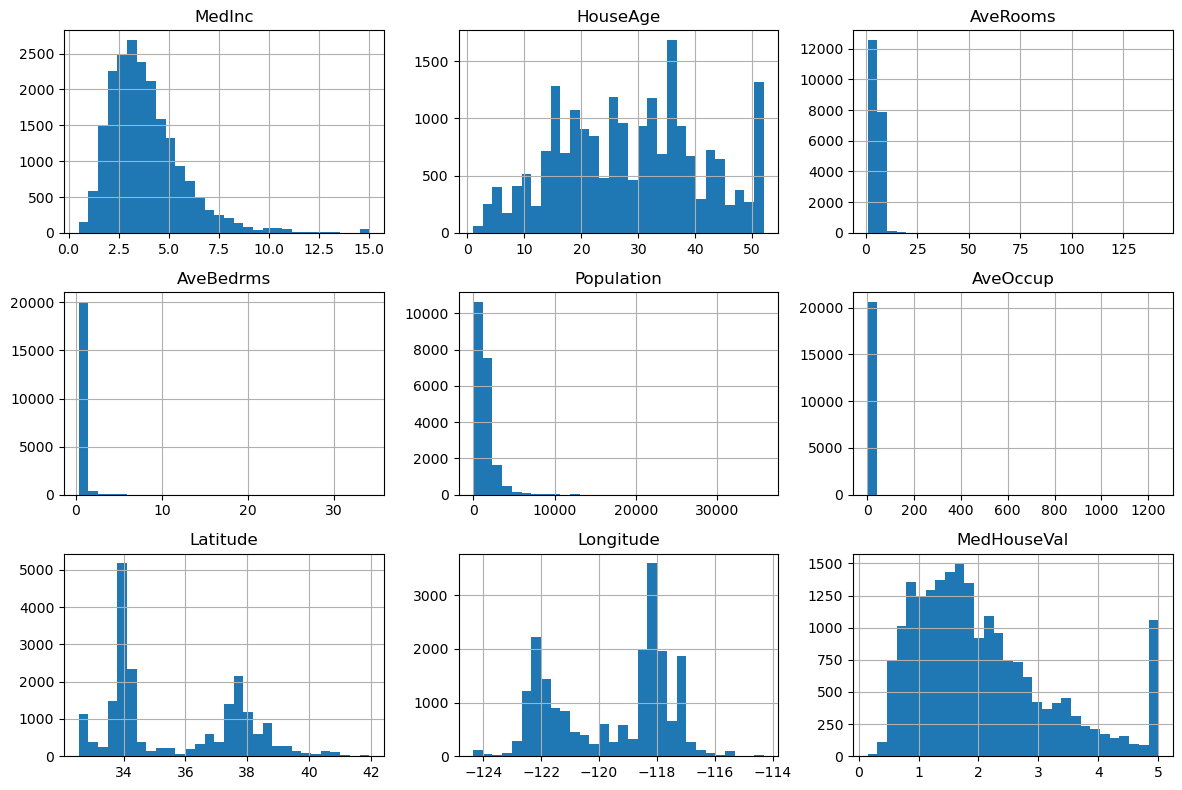

In [12]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


---

## 5. Correlation Analysis

**Task:**  
- Visualize the correlation matrix as a heatmap.
- Identify which features are most strongly correlated with the target (`MedHouseVal`).


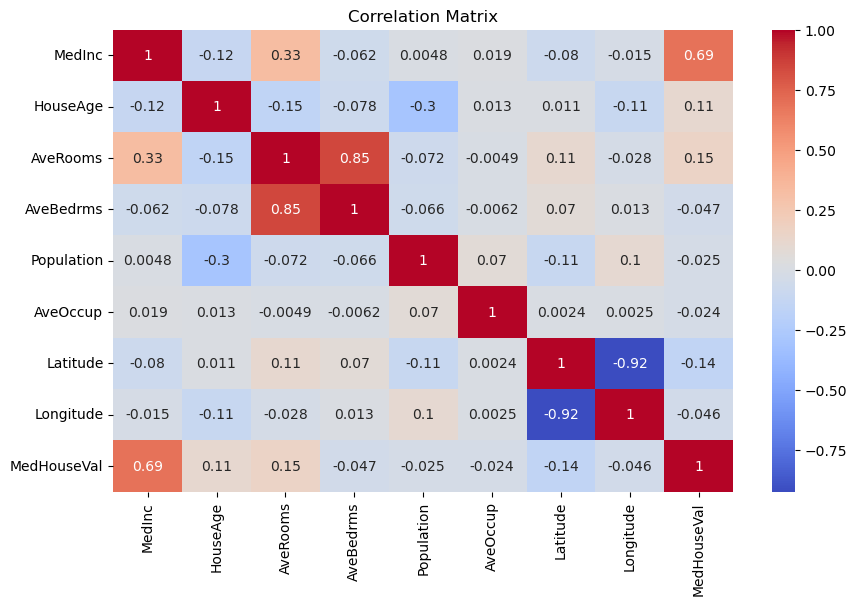

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


---

## 6. Visualize Key Relationships

**Task:**  
- Create scatter plots showing the relationship between `MedHouseVal` and two features of your choice.
- Interpret the relationships.


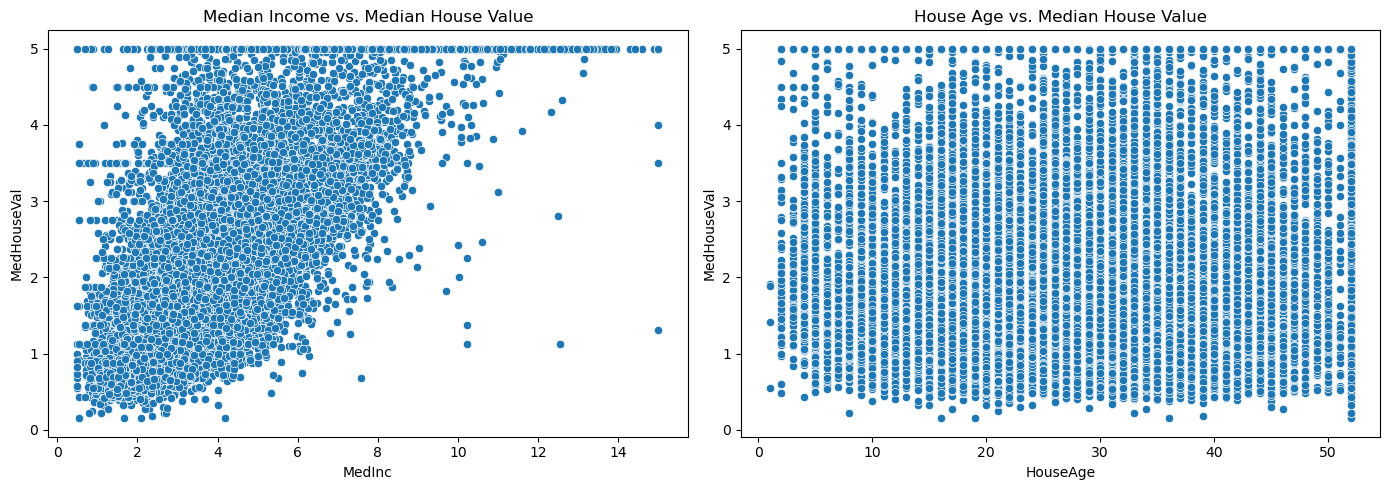

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Median Income vs. Median House Value")

plt.subplot(1, 2, 2)
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df)
plt.title("House Age vs. Median House Value")

plt.tight_layout()
plt.show()


---

## 7. Feature Engineering

Let's check if we can create a better feature!  
**Task:**  
- Create a new feature: `RoomsPerPerson = AveRooms / Population`
- Add this to the dataframe.
- Check the correlation of this feature with the target.


In [25]:
df['RoomsPerPerson'] = df['AveRooms'] / df['Population']
print("Correlation with MedHouseVal:", df[['RoomsPerPerson', 'MedHouseVal']].corr())


Correlation with MedHouseVal:                 RoomsPerPerson  MedHouseVal
RoomsPerPerson         1.00000      0.01156
MedHouseVal            0.01156      1.00000


---

## 8. Prepare Data for Modeling

**Tasks:**
- Define `X` (feature matrix) and `y` (target).
- Split the data into training and testing sets (80%/20%).


In [30]:
features = [col for col in df.columns if col != 'MedHouseVal']
X = df[features]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (16512, 9)
Test shape: (4128, 9)


---

## 9. Build a Linear Regression Model

**Task:**
- Train a linear regression model using Scikit-learn.


In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

---

## 10. Model Evaluation

**Tasks:**
- Predict on the test set.
- Compute RMSE (Root Mean Squared Error) and R² score.


In [36]:
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test RMSE: {:.3f}".format(rmse))
print("Test R²: {:.3f}".format(r2))


Test RMSE: 0.745
Test R²: 0.576


---

## 11. Visualize Predictions

**Task:**  
- Create a scatter plot of predicted vs. actual house values.
- Plot the ideal y = x line for reference.


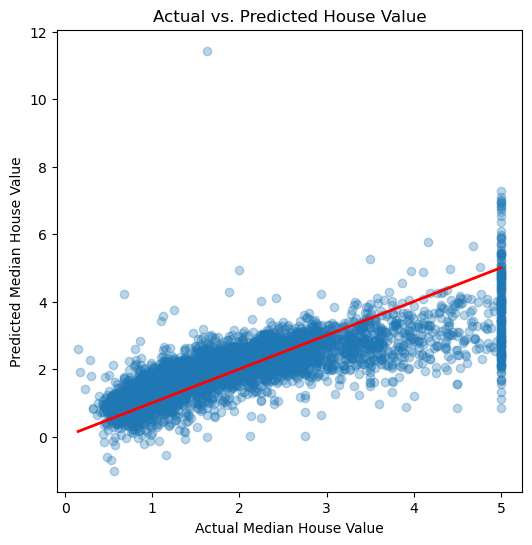

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Value")
plt.show()


---

## 12. Interpret the Model

**Task:**  
- Print out the coefficients for each feature.
- Which features are most influential in predicting house value?


In [42]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df


,Feature,Coefficient
3,AveBedrms,0.786061
0,MedInc,0.448511
7,Longitude,-0.434052
6,Latitude,-0.420142
2,AveRooms,-0.122834
8,RoomsPerPerson,-0.061908
1,HouseAge,0.009733
5,AveOccup,-0.003524
4,Population,-0.000002


## 13. Questions for You

**Answer the following (write in markdown cells):**

1. Which features are most predictive of median house value?  
2. What are some limitations of linear regression for this problem?  
3. How could you improve the model further (e.g., feature engineering, nonlinear models)?  
4. (Optional) Try adding polynomial features, log transforms, or train a different regression model (like Random Forest) and compare results.

---

## 14. (Optional) Experiment Further!

- Try dropping or transforming features with high skew.
- Use regularization (`Ridge`, `Lasso`).
- Explore more sophisticated visualizations (e.g., pairplots, 3D plots).
- Report your findings!

---
